new code for fake currency detection

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter the value of currency which you want to chake for Real and Fake500
Found 39 images belonging to 2 classes.
Found 5 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 14s/step - accuracy: 0.7131 - loss: 3.4652 - val_accuracy: 1.0000 - val_loss: 2.2431e-04 - learning_rate: 0.0010
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.6632 - loss: 2.2160 - val_accuracy: 1.0000 - val_loss: 8.7843e-04 - learning_rate: 0.0010
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 13s/step - accuracy: 0.7509 - loss: 0.4710 - val_accuracy: 1.0000 - val_loss: 0.0249 - learning_rate: 0.0010
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 12s/step - accuracy: 0.6691 - loss: 0.6382 - val_accuracy: 1.0000 - val_loss: 1.0657e-04 - learning_rate: 0.0010
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.7628 - loss: 0.5823 - val_accuracy: 1.0000 - val_loss: 7.7246e-06 - learning_rate: 0.0010
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 10s/step - accuracy: 0.8327 - loss: 0.4108 - val_accuracy: 1.0000 - val_loss: 1.4305e-07 - learning_rate: 0.0010
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 25s 14s/step - accuracy: 0.7204 - loss: 0.5558 - val_accuracy: 

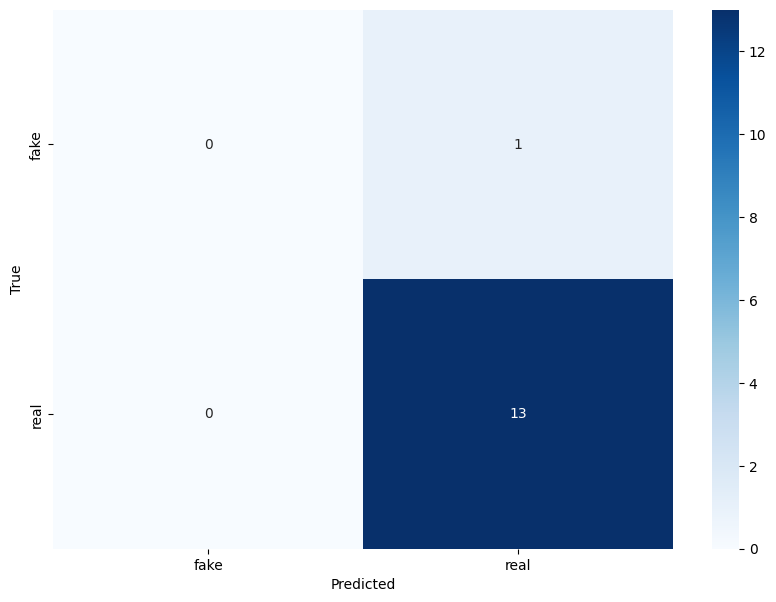

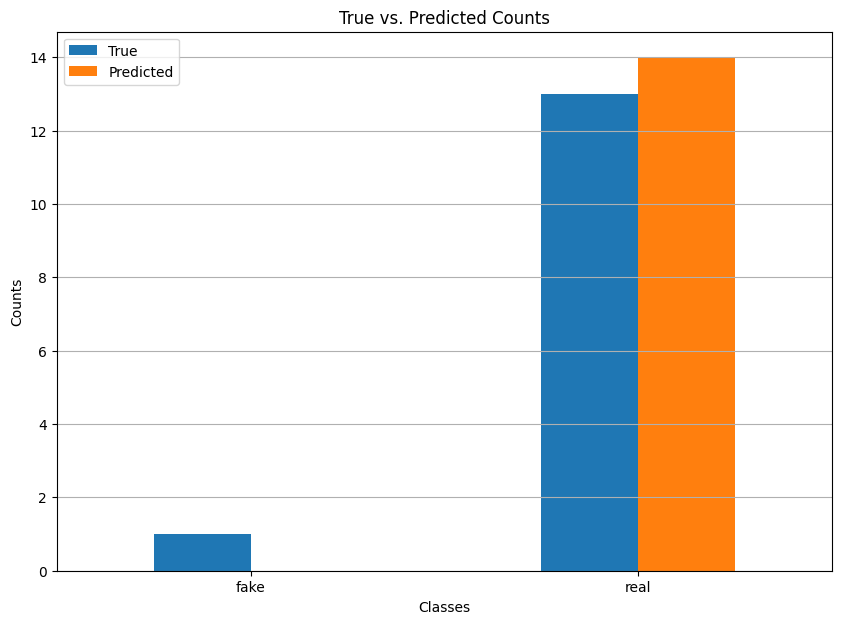

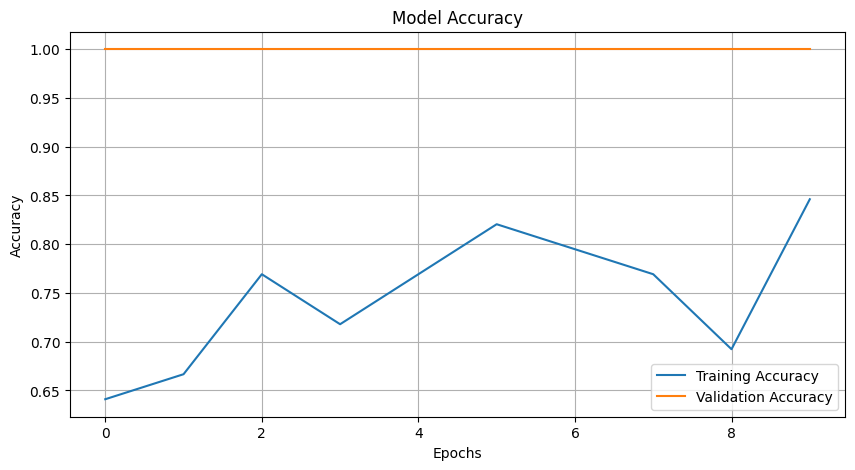

Enter the path of an image/content/32.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The currency is real.
[1]


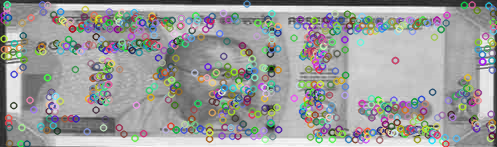

In [27]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# Mount Google Drive
drive.mount('/content/drive')
num = int(input("Enter the value of currency which you want to chake for Real and Fake"))
if (num == 2000):
# Path to directories
  train_dir = '/content/drive/MyDrive/FakeCurrencyDetectionSystem/Dataset/Training2000'
  validation_dir = '/content/drive/MyDrive/FakeCurrencyDetectionSystem/Dataset/validation2000'
  test_dir = '/content/drive/MyDrive/FakeCurrencyDetectionSystem/Dataset/Testing2000'

elif(num == 500):
  train_dir = '/content/drive/MyDrive/FakeCurrencyDetectionSystem/Dataset/Training500'
  validation_dir = '/content/drive/MyDrive/FakeCurrencyDetectionSystem/Dataset/Validation500'
  test_dir = '/content/drive/MyDrive/FakeCurrencyDetectionSystem/Dataset/Testing500'

elif(num==200):
  train_dir = '/content/drive/MyDrive/FakeCurrencyDetectionSystem/Dataset/Training200'
  validation_dir = '/content/drive/MyDrive/FakeCurrencyDetectionSystem/Dataset/Validation200'
  test_dir = '/content/drive/MyDrive/FakeCurrencyDetectionSystem/Dataset/Testing200'

elif(num==100):
  train_dir = '/content/drive/MyDrive/FakeCurrencyDetectionSystem/Dataset/Training100'
  validation_dir = '/content/drive/MyDrive/FakeCurrencyDetectionSystem/Dataset/Validation100'
  test_dir = '/ccontent/drive/MyDrive/FakeCurrencyDetectionSystem/Dataset/Testing100'
else:
  print("This value of currency is not Valid")

# Step 1: Load a pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(2, activation='softmax')(x)  # Output layer with 2 classes (genuine vs counterfeit)

# Step 3: Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze some of the top layers of the base model
for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[-20:]:
    layer.trainable = True

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=100,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Check directories and create data generators
if not os.path.exists(train_dir):
    print(f"Error: Training directory not found: {train_dir}")
else:
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )

if not os.path.exists(validation_dir):
    print(f"Error: Validation directory not found: {validation_dir}")
else:
    validation_generator = train_datagen.flow_from_directory(  # Create validation_generator outside the if block
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )

if not os.path.exists(test_dir):
    print(f"Error: Test directory not found: {test_dir}")
else:
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

# Step 5: Train the model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[reduce_lr]
)

# Step 6: Evaluate the model
if test_generator:
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
    print(f'Test Loss: {test_loss}')
    print(f'Test Accuracy: {test_accuracy*100}')

    # Generate confusion matrix
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes
    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Create a DataFrame for true and predicted values
    data = pd.DataFrame({'True': y_true, 'Predicted': y_pred_classes})

    # Count occurrences of each class for true and predicted
    true_counts = data['True'].value_counts().sort_index()
    pred_counts = data['Predicted'].value_counts().sort_index()

    # Create a combined DataFrame for plotting
    combined_counts = pd.DataFrame({'True': true_counts, 'Predicted': pred_counts}).fillna(0)

    # Plotting
    combined_counts.plot(kind='bar', figsize=(10, 7))
    plt.title('True vs. Predicted Counts')
    plt.xlabel('Classes')
    plt.ylabel('Counts')
    plt.xticks(ticks=range(len(combined_counts.index)), labels=list(test_generator.class_indices.keys()), rotation=0)
    plt.legend(['True', 'Predicted'])
    plt.grid(axis='y')
    plt.show()


    # Plotting accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Step 7: Function to load and preprocess the test image
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Path to the test image
img_path = input("Enter the path of an image")

# Load and preprocess the test image
test_img = load_and_preprocess_image(img_path)

# Make a prediction
predictions = model.predict(test_img)

# Interpret the results
predicted_class = np.argmax(predictions, axis=1)  # Get the index of the class with the highest probability

# Assuming class 0 is "fake" and class 1 is "real"
if predicted_class >=1:
    print("The currency is real.")
else:
    print("The currency is fake.")

print(predicted_class)

# Optional: Example for keypoint detection using OpenCV
img = cv2.imread(img_path, 0)  # Load image in grayscale

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)

# Display the image with keypoints
cv2_imshow(img_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()
